In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df=pd.read_csv('house_price.csv')

In [2]:
print("First five rows of the data")
print(df.head())

First five rows of the data
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [3]:
print("The shape of the dataframe")
print(df.shape)

The shape of the dataframe
(13200, 7)


In [4]:
print("Data information")
print(df.info())

Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [5]:
print("Summary statistics")
print(df.describe())

Summary statistics
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [6]:
print("Missing values")
print(df.isnull().sum())

Missing values
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [7]:

df['price_per_sqft'] = df['price'] / df['total_sqft']
print(df['price_per_sqft'].describe())

count    13200.000000
mean         0.079208
std          1.067272
min          0.002678
25%          0.042677
50%          0.054383
75%          0.073171
max        120.000000
Name: price_per_sqft, dtype: float64


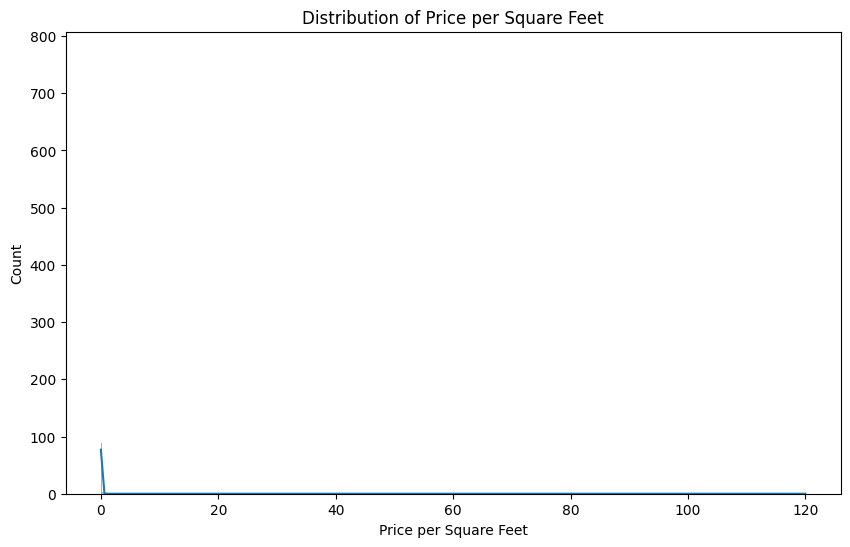

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Distribution of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.show()

In [9]:
#Detecting the outliers using various methods 
df_mean_std = df.copy()
df_percentile = df.copy()
df_iqr = df.copy()
df_zscore = df.copy()

mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
df_mean_std['price_per_sqft'] = df_mean_std['price_per_sqft'][(df_mean_std['price_per_sqft'] >= lower_bound) & (df_mean_std['price_per_sqft'] <= upper_bound)]

lower_bound = df['price_per_sqft'].quantile(0.05)
upper_bound = df['price_per_sqft'].quantile(0.95)
df_percentile['price_per_sqft'] = df_percentile['price_per_sqft'][(df_percentile['price_per_sqft'] >= lower_bound) & (df_percentile['price_per_sqft'] <= upper_bound)]


Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr['price_per_sqft'] = df_iqr['price_per_sqft'][(df_iqr['price_per_sqft'] >= lower_bound) & (df_iqr['price_per_sqft'] <= upper_bound)]

z_scores = np.abs(stats.zscore(df['price_per_sqft']))
df_zscore['price_per_sqft'] = df_zscore['price_per_sqft'][z_scores < 3]


print("Original data points:", len(df))
print("After mean_std method:", df_mean_std['price_per_sqft'].count())
print("After percentile method (5-95%):", df_percentile['price_per_sqft'].count())
print("After IQR method:", df_iqr['price_per_sqft'].count())
print("After Z-score method:", df_zscore['price_per_sqft'].count())


Original data points: 13200
After mean_std method: 13195
After percentile method (5-95%): 11880
After IQR method: 11935
After Z-score method: 13195


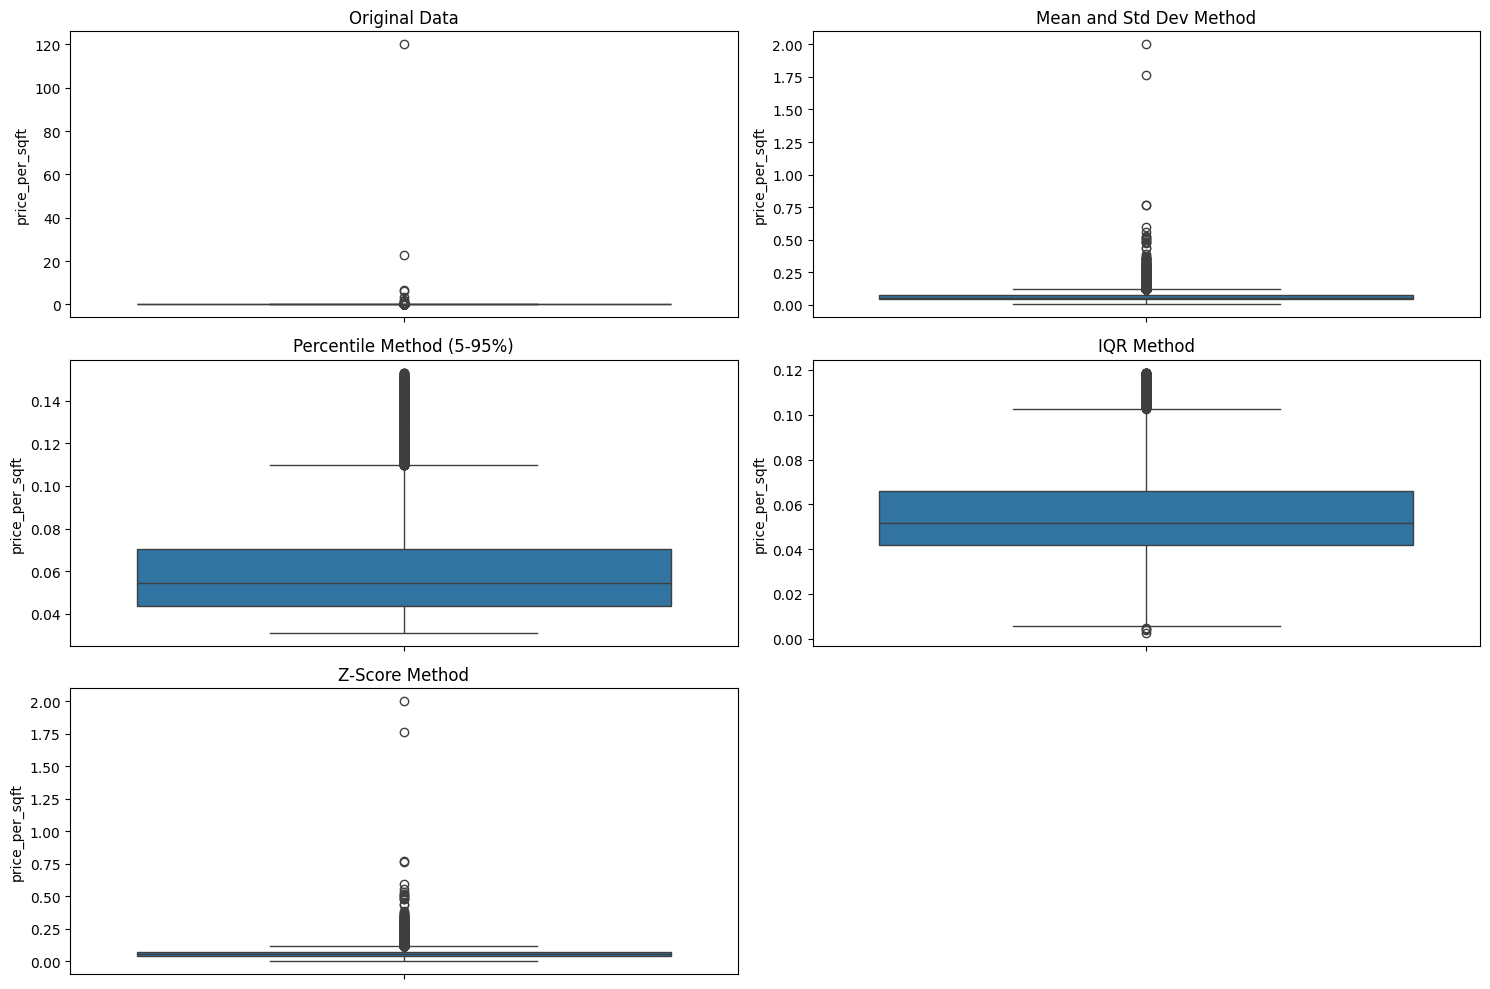

In [10]:
# Creating a box plot and use this to determine which method seems to work best 
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.boxplot(df['price_per_sqft'])
plt.title('Original Data')

plt.subplot(3, 2, 2)
sns.boxplot(df_mean_std['price_per_sqft'].dropna())
plt.title('Mean and Std Dev Method')

plt.subplot(3, 2, 3)
sns.boxplot(df_percentile['price_per_sqft'].dropna())
plt.title('Percentile Method (5-95%)')

plt.subplot(3, 2, 4)
sns.boxplot(df_iqr['price_per_sqft'].dropna())
plt.title('IQR Method')

plt.subplot(3, 2, 5)
sns.boxplot(df_zscore['price_per_sqft'].dropna())
plt.title('Z-Score Method')

plt.tight_layout()
plt.show()

Original Price per Sqft:
Skewness: 108.26875399964706
Kurtosis: 12090.634145107539


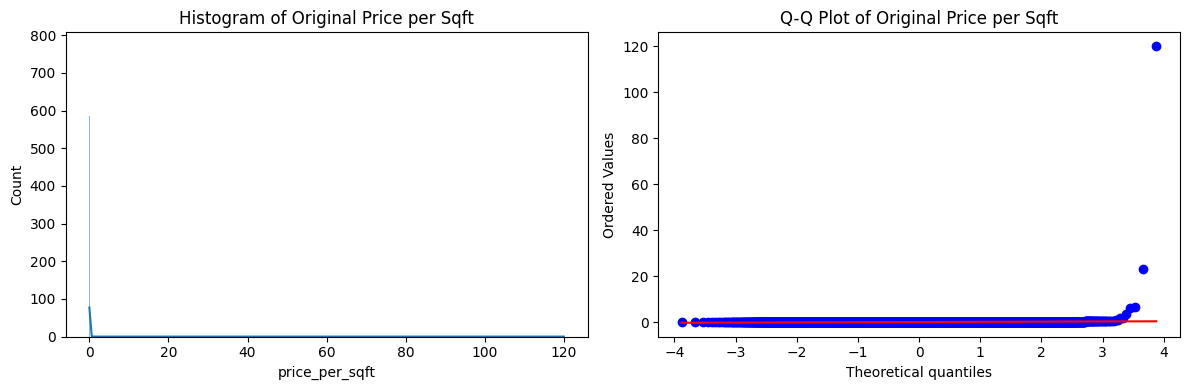

Log-transformed Price per Sqft:
Skewness: 1.3999697883578328
Kurtosis: 9.200695268074353


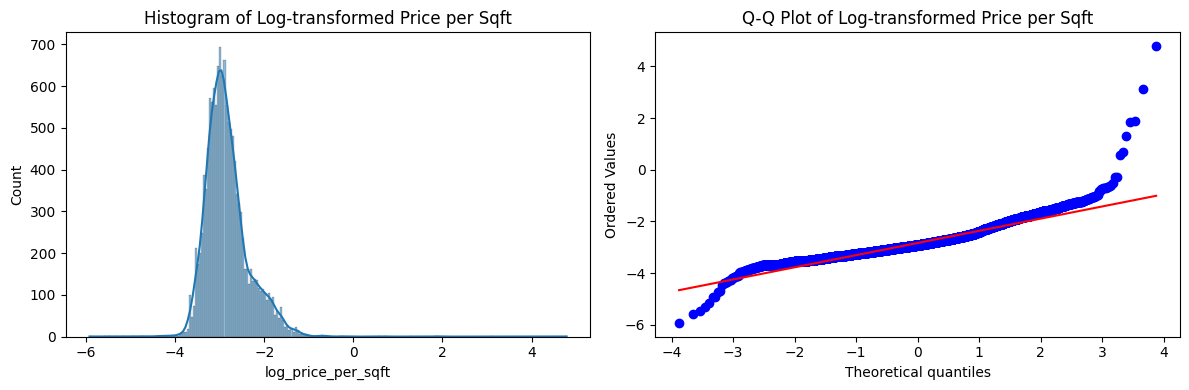

Square root-transformed Price per Sqft:
Skewness: 50.9214252119826
Kurtosis: 4032.9030161470464


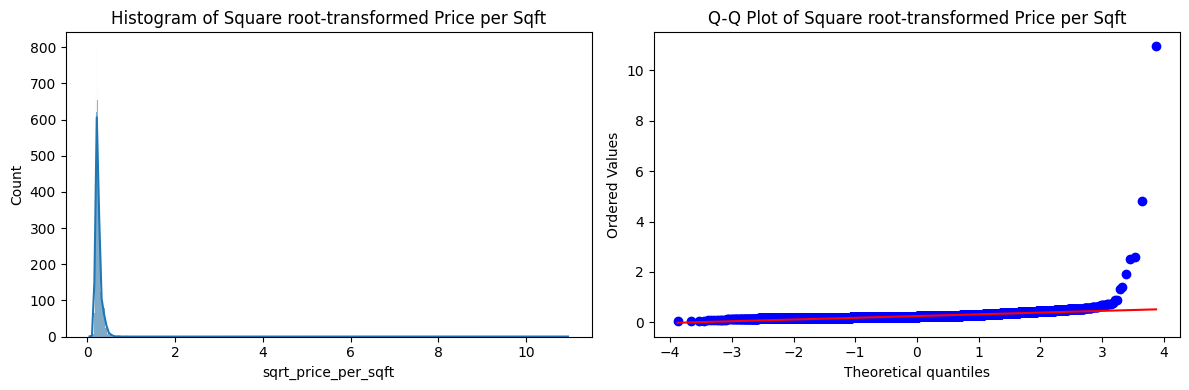

In [11]:
#checking the normality of the column(price per sqft column) and perform transformations
from scipy.stats import skew, kurtosis
def check_normality(data, title):
    print(f"{title}:")
    print(f"Skewness: {skew(data)}")
    print(f"Kurtosis: {kurtosis(data)}")   
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {title}')
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {title}')
    plt.tight_layout()
    plt.show()

check_normality(df['price_per_sqft'], "Original Price per Sqft")

df['log_price_per_sqft'] = np.log(df['price_per_sqft'])
check_normality(df['log_price_per_sqft'], "Log-transformed Price per Sqft")

df['sqrt_price_per_sqft'] = np.sqrt(df['price_per_sqft'])
check_normality(df['sqrt_price_per_sqft'], "Square root-transformed Price per Sqft")

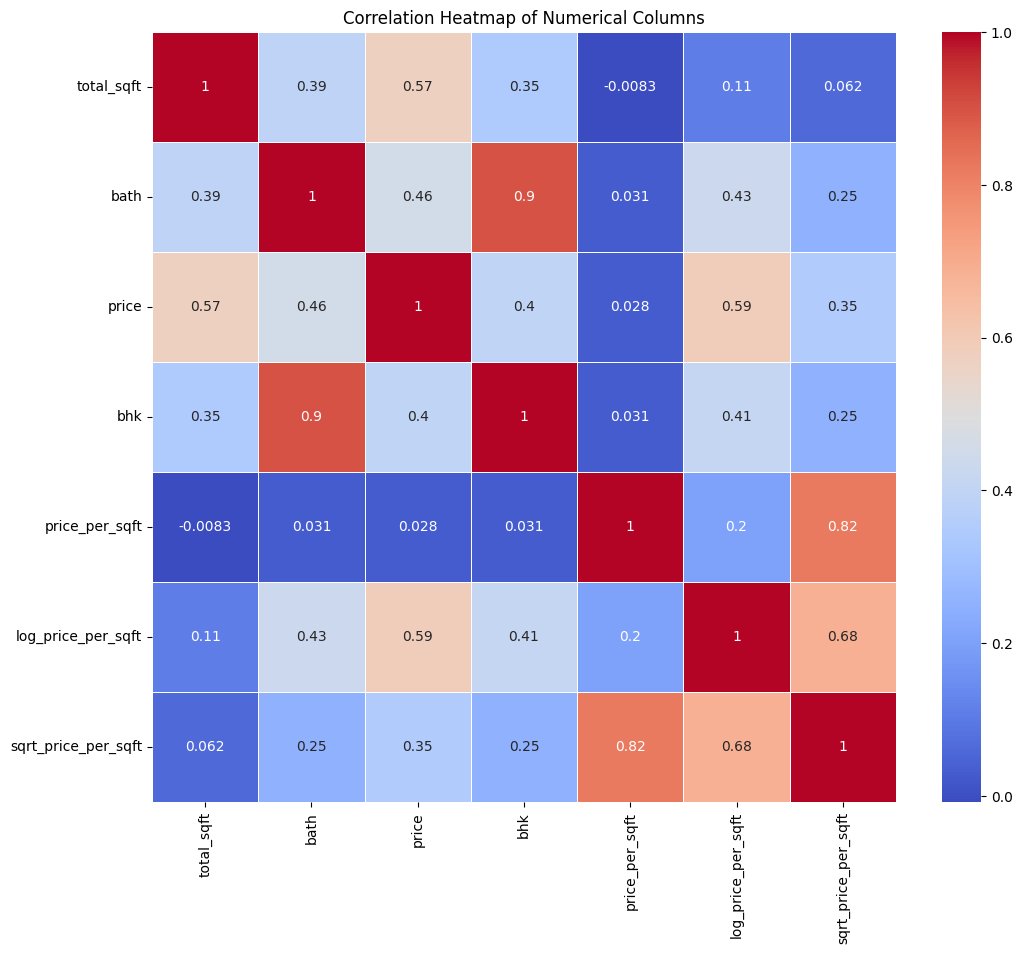

In [12]:
# Correlation analysis and heatmap
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

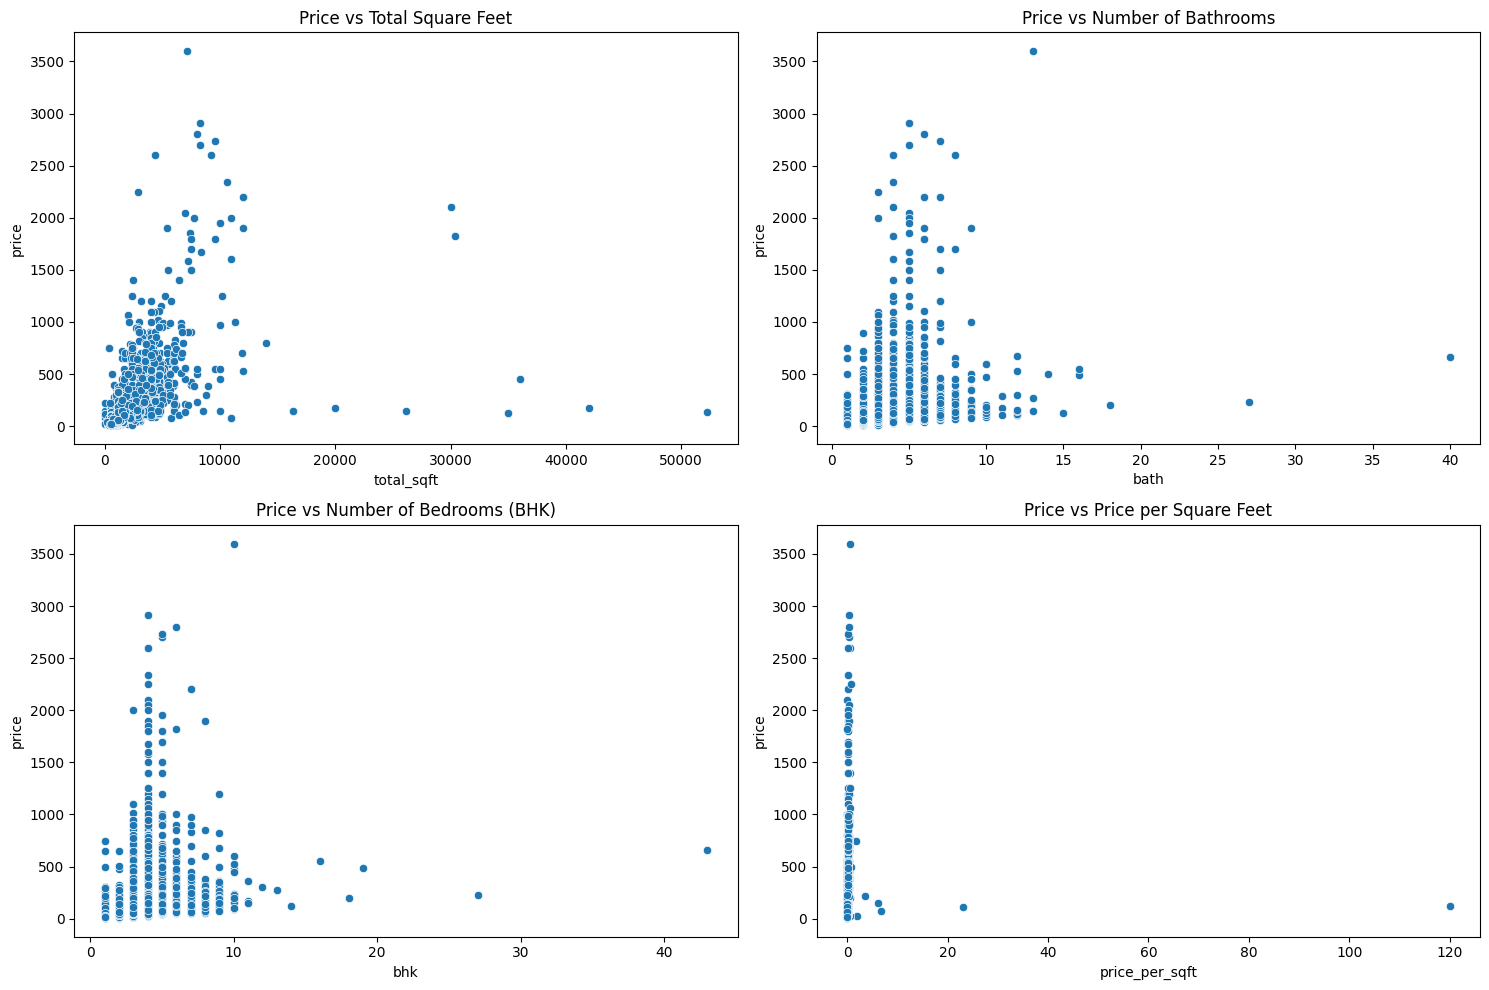

In [13]:
# Scatter plots between variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Price vs Total Square Feet')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='bath', y='price')
plt.title('Price vs Number of Bathrooms')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='bhk', y='price')
plt.title('Price vs Number of Bedrooms (BHK)')
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='price_per_sqft', y='price')
plt.title('Price vs Price per Square Feet')
plt.tight_layout()
plt.show()